In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(dpi=200)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [3]:
# Importing Our Dataset
from sklearn.datasets import load_wine

In [4]:
data = load_wine()

In [9]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [13]:
features = data['feature_names']

In [20]:
features = pd.DataFrame(data['data'],columns=data['feature_names'])

In [21]:
features.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [27]:
target = data['target']

In [ ]:
my_dict = { 'class 0':0, 'class 1':1 , 'class 2':2

In [29]:
# Checking Our Data
features.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [30]:
# Scaling our Data 
from sklearn.preprocessing import StandardScaler
scale_model = StandardScaler()
scaled_features = scale_model.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

In [35]:

#  Splitting Our Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features,target,test_size=0.2)

In [36]:
# Importing Our Model
from sklearn.linear_model import LogisticRegressionCV


In [37]:
model = LogisticRegressionCV()

In [38]:
model.fit(x_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [39]:
pred = model.predict(x_test)

In [40]:
# MOdel Evaluation
pred[:5]

array([1, 1, 1, 1, 1])

In [41]:
y_test[:5]

array([1, 1, 1, 1, 1])

In [42]:
# Model Accuracy
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix


In [43]:
print(f'{accuracy_score(y_test,pred)}')

0.9722222222222222


In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00         4

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [45]:
confusion_matrix(y_test,pred)

array([[11,  0,  0],
       [ 1, 20,  0],
       [ 0,  0,  4]], dtype=int64)

In [46]:
cnf = pd.DataFrame(confusion_matrix(y_test,pred),columns=['Class 0','Class 1','Class 2'],index=['Class 0','Class 1','Class 2'])

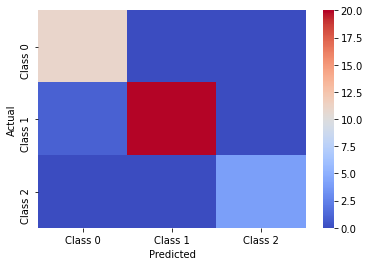

In [47]:
# Plotting Our Model Prediction 
sns.heatmap(cnf,cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()